In [1]:
import numpy as np
import ruptures as rpt
import os
from andi_datasets.models_phenom import models_phenom
from andi_datasets.utils_trajectories import plot_trajs
from andi_datasets.utils_challenge import label_continuous_to_list
from test_for_submit import merge_changepoints
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from copy import deepcopy

/home/jiangy/anaconda3/envs/andi2/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [108]:
import dill
from torch.utils.data import DataLoader
from running1 import collate_superv_for_cp

with open('/data1/jiangy/andi_data/0629_merge/train/dataset_part0.pkl', 'rb') as f:
    train_dataset = dill.load(f)
train_loader = DataLoader(dataset=train_dataset,
                                  batch_size=64,
                                  shuffle=True,
                                  num_workers=8,
                                  pin_memory=True,
                                  collate_fn=lambda x: collate_superv_for_cp(x, max_len=200))

In [109]:
train_iter = iter(train_loader)
batch0 = next(train_iter)
X, targets, padding_masks, IDs = batch0

In [114]:
cnt0 = [0, 0, 0, 0]
cnt1 = [0, 0, 0, 0]
for i, batch in enumerate(train_loader):
    X, targets, padding_masks, IDs = batch0
    s0 = np.where(targets[:, :, 2] == 0.)[0]
    s1 = np.where(targets[:, :, 2] == 1.)[0]
    s2 = np.where(targets[:, :, 2] == 2.)[0]
    s3 = np.where(targets[:, :, 2] == 3.)[0]
    t01, t02, t03 = set(s0.tolist()).intersection(set(s1.tolist())),set(s0.tolist()).intersection(set(s2.tolist())),set(s0.tolist()).intersection(set(s3.tolist()))
    cnt0[0] += len(t01)
    cnt0[1] += len(t02)
    cnt0[2] += len(t03)
    # cnt0[3] += len(t123)
    t13, t12, t23, t123 = set(s1.tolist()).intersection(set(s3.tolist())),set(s1.tolist()).intersection(set(s2.tolist())),set(s2.tolist()).intersection(set(s3.tolist())),set(s1.tolist()).intersection(set(s3.tolist())).intersection(set(s2.tolist()))
    cnt1[0] += len(t13)
    cnt1[1] += len(t12)
    cnt1[2] += len(t23)
    cnt1[3] += len(t123)
print(cnt0, cnt1)

[0, 9376, 0, 0] [0, 37504, 9376, 0]


In [115]:
s0 = np.where(targets[:, :, 2] == 0.)[0]
s1 = np.where(targets[:, :, 2] == 1.)[0]
s2 = np.where(targets[:, :, 2] == 2.)[0]
s3 = np.where(targets[:, :, 2] == 3.)[0]
t01, t02, t03 = set(s0.tolist()).intersection(set(s1.tolist())),set(s0.tolist()).intersection(set(s2.tolist())),set(s0.tolist()).intersection(set(s3.tolist()))
t13, t12, t23, t123 = set(s1.tolist()).intersection(set(s3.tolist())),set(s1.tolist()).intersection(set(s2.tolist())),set(s2.tolist()).intersection(set(s3.tolist())),set(s1.tolist()).intersection(set(s3.tolist())).intersection(set(s2.tolist()))
print(t01, t02, t03, t12, t13, t23, t123)

set() {40, 44} set() {0, 36, 38, 42, 46, 48, 18, 19} set() {3, 4} set()


tensor([[ 1.8900, -1.3568,  2.0000,  0.0000],
        [ 1.8900, -1.3568,  2.0000,  0.0000],
        [ 1.8900, -1.3568,  2.0000,  0.0000],
        [ 1.8900, -1.3568,  2.0000,  0.0000],
        [ 1.8900, -1.3568,  2.0000,  0.0000],
        [ 1.8900, -1.3568,  2.0000,  0.0000],
        [ 1.8900, -1.3568,  2.0000,  0.0000],
        [ 1.8900, -1.3568,  2.0000,  0.0000],
        [ 1.8900, -1.3568,  2.0000,  0.0000],
        [ 1.9500,  4.3104,  3.0000,  1.0000],
        [ 1.9500,  4.3104,  3.0000,  0.0000],
        [ 1.9500,  4.3104,  3.0000,  0.0000],
        [ 1.9500,  4.3104,  3.0000,  0.0000],
        [ 1.9500,  4.3104,  3.0000,  0.0000],
        [ 1.9500,  4.3104,  3.0000,  0.0000],
        [ 1.9500,  4.3104,  3.0000,  0.0000],
        [ 1.9500,  4.3104,  3.0000,  0.0000],
        [ 1.9500,  4.3104,  3.0000,  0.0000],
        [ 1.9500,  4.3104,  3.0000,  0.0000],
        [ 1.9500,  4.3104,  3.0000,  0.0000],
        [ 0.0000,  0.0000,  5.0000,  5.0000],
        [ 0.0000,  0.0000,  5.0000

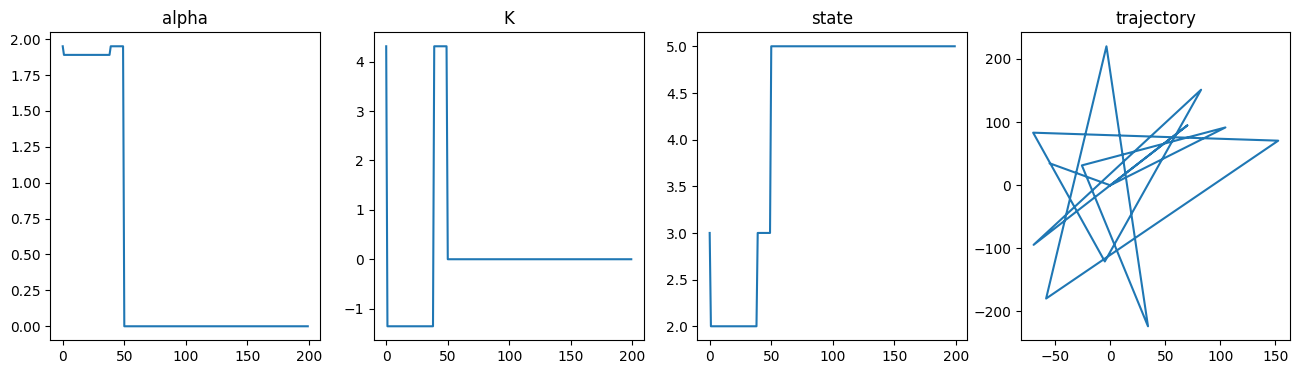

In [126]:
idx = 4
print(targets[idx, 30:55, :])
plt.figure(figsize=(16,4))
plt.subplot(141)
plt.plot(targets[idx, :, 0])
plt.title('alpha')
# plt.vlines(46, 0, 2, colors='red')
plt.subplot(142)
plt.plot(targets[idx, :, 1])
plt.title('K')
# plt.vlines(46, 0, 100, colors='red')
plt.subplot(143)
plt.plot(targets[idx, :, 2])
plt.title('state')
plt.subplot(144)
plt.plot(X[idx, :, 0], X[idx, :, 1])
plt.title('trajectory')
plt.show()

In [92]:
N=100
L=1.5*128
T_1=200
# trajs_model2, labels_model2 = models_phenom().confinement(N,T_1,L,alphas=[[1, 0], [0.5, 0]],Ds=[[1, 0], [0.1, 0]],)
# trajs_model2 = trajs_model2.transpose(1,0,2)
# labels_model2 = labels_model2.transpose(1,0,2)
a_1, a_2, a_3 = 1.75, 1.0, 0.1
k_1, k_2, k_3 = 2, 0.2, 0.005
# trajs_model2, labels_model2 = models_phenom().multi_state(N=N,
#                                                                   L=L,
#                                                                   T=T_1,
#                                                                   epsilon_a=[0, 0],
#                                                                   gamma_d=[1, 1],
#                                                                   alphas=[[a_1, 0.1 * a_1], [a_2, 0.1 * a_2], [a_3, 0.1 * a_3]],
#                                                                   # Fixed alpha for each state
#                                                                   Ds=[[k_1, 0.1 * k_1], [k_2, 0.1 * k_2], [k_3, 0.1 * k_3]],
#                                                                   # Mean and variance of each state
#                                                                   M=[[0.99, 0.005, 0.005], [0.005, 0.99, 0.005],
#                                                                      [0.005, 0.005, 0.99]]
#                                                                   )
# trajs_model2, labels_model2 = models_phenom().immobile_traps(N = N,
#                                                                         T = T_1,                
#                                                                         L = L,
#                                                                         r = 5,
#                                                                         Pu = 0.1, 
#                                                                         Pb = 0.01, 
#                                                                         Ds = [k_3, 0.1*k_3], 
#                                                                         alphas = [a_1, 0.1 * a_1], 
#                                                                         Nt = 10,
#                                                                         # traps_pos: np.array = None,
#                                                                         # deltaT = 1
#                                                                         )
r_1 = 5
number_compartments = 50
radius_compartments = 10
compartments_center = models_phenom._distribute_circular_compartments(Nc = number_compartments, 
                                                                     r = radius_compartments,
                                                                     L = L # size of the environment
                                                                     ) 
trajs_model2, labels_model2 = models_phenom().confinement(N = N,
                                                            T = T_1,
                                                            L = L,
                                                            Ds = [[k_1, 0.1 * k_1], [k_2, 0.1 * k_2]], 
                                                            alphas = [[a_1, 0.1 * a_1], [a_2, 0.1 * a_2]],
                                                            gamma_d = [1], 
                                                            epsilon_a = [0],
                                                            r = radius_compartments,
                                                            comp_center = compartments_center,
                                                            Nc = 10,
                                                            trans = 0.1, 
                                                            )

In [93]:
# print(r'alphas:', np.unique(labels_model2[:, :, 0]), 'D:', np.unique(labels_model2[:, :, 1]),)
print('state:', np.unique(labels_model2[:, :, 2]) )

state: [1. 2. 3.]


In [96]:
s1 = np.where(labels_model2[:, :, 2] == 1.)[1]
s2 = np.where(labels_model2[:, :, 2] == 2.)[1]
s3 = np.where(labels_model2[:, :, 2] == 3.)[1]
set(s1.tolist()).intersection(set(s3.tolist())),set(s1.tolist()).intersection(set(s2.tolist())),set(s2.tolist()).intersection(set(s3.tolist())),set(s1.tolist()).intersection(set(s3.tolist())).intersection(set(s2.tolist()))

({24, 27, 35, 39, 40, 49, 63, 86},
 {0,
  1,
  2,
  3,
  4,
  5,
  7,
  8,
  11,
  12,
  13,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  25,
  26,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  36,
  38,
  43,
  45,
  46,
  48,
  50,
  51,
  53,
  54,
  56,
  57,
  59,
  60,
  61,
  62,
  64,
  65,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  82,
  83,
  85,
  87,
  88,
  89,
  91,
  92,
  93,
  94,
  96,
  97,
  99},
 set(),
 set())

In [99]:
idx = 24
cp, _, _, _ = label_continuous_to_list(labels_model2[:, idx, :])
cp

array([ 39,  40,  95,  96, 200])

In [90]:
labels_model2[40:50, idx, :]

array([[1.06336855, 0.29203544, 1.        ],
       [1.06336855, 0.29203544, 1.        ],
       [1.06336855, 0.29203544, 1.        ],
       [1.06336855, 0.29203544, 1.        ],
       [1.06336855, 0.29203544, 1.        ],
       [1.91658973, 2.07508033, 3.        ],
       [1.91658973, 2.07508033, 3.        ],
       [1.91658973, 2.07508033, 3.        ],
       [1.91658973, 2.07508033, 3.        ],
       [1.91658973, 2.07508033, 3.        ]])

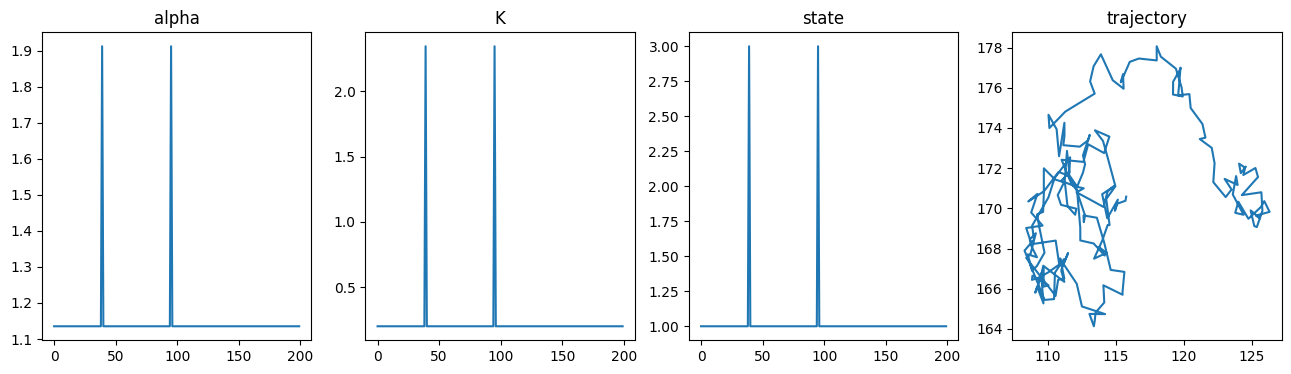

In [100]:
plt.figure(figsize=(16,4))
plt.subplot(141)
plt.plot(labels_model2[:, idx, 0])
plt.title('alpha')
# plt.vlines(46, 0, 2, colors='red')
plt.subplot(142)
plt.plot(labels_model2[:, idx, 1])
plt.title('K')
# plt.vlines(46, 0, 100, colors='red')
plt.subplot(143)
plt.plot(labels_model2[:, idx, 2])
plt.title('state')
plt.subplot(144)
plt.plot(trajs_model2[:, idx, 0], trajs_model2[:, idx, 1])
plt.title('trajectory')
plt.show()

In [21]:
# preds_all = np.load('../../challenge_results/0710/oyX/track_1_vip_preds_all.npy', allow_pickle=True)
# pad_all = np.load('../../challenge_results/0710/oyX/track_1_vip_pad_all.npy', allow_pickle=True)
# preds_all = np.load('../../challenge_results/0705/7av/track_1_vip_preds_all.npy', allow_pickle=True)
# pad_all = np.load('../../challenge_results/0705/7av/track_1_vip_pad_all.npy', allow_pickle=True)
# preds_all = np.load('../../challenge_results/0701/daR_0701/track1_all_preds_all.npy', allow_pickle=True)
# pad_all = np.load('../../challenge_results/0701/daR_0701/track1_all_pad_all.npy', allow_pickle=True)
# preds_all = np.load('../../challenge_results/0701/daR_0701/track1_vip_preds_all.npy', allow_pickle=True)
# pad_all = np.load('../../challenge_results/0701/daR_0701/track1_vip_pad_all.npy', allow_pickle=True)

preds_all = np.load('../../challenge_results/0705/daR/track_2_all_preds_all.npy', allow_pickle=True)
pad_all = np.load('../../challenge_results/0705/daR/track_2_all_pad_all.npy', allow_pickle=True)
# 
# preds_all = np.load('../../results/daR/track1_vip_preds_all.npy', allow_pickle=True)
# pad_all = np.load('../../results/daR/track1_vip_pad_all.npy', allow_pickle=True)
# preds_all = np.load('../../results/daR/track_2_all_preds_all.npy', allow_pickle=True)
# pad_all = np.load('../../results/daR/track_2_all_pad_all.npy', allow_pickle=True)
preds_all_stage2 = None
preds_all_stage2_c = None
# preds_all_stage2 = np.load('../../challenge_results/0711/nSQ/track_1_all_preds_all.npy', allow_pickle=True)
# preds_all_stage2_c = np.load('../../challenge_results/0712/URg/track_1_all_preds_all.npy', allow_pickle=True)

In [5]:
idx = 0
true_len = pad_all[0][0][0][0].sum()
a = pred_0_0[0, :true_len, 0]
k = pred_0_0[0, :true_len, 1]
np.mean(a), np.max(a), np.std(a), np.mean(k), np.max(k), np.std(k)
# for i in range(pred_0_0.shape[0]):
#     var = np.mean(pred_0_0[i, :, 0])
#     print('{}: mean: {}, var: {}')

(0.95988, 0.95988, 0.0, 0.18995756, 0.18995756, 0.0)

In [22]:
num_exp=12
exp_range = range (num_exp)
# exp_range = [0, 1, 2, 3, 4, 7, 9, 10, 11] # 11没必要
# exp_range = [0, 1, 2, 3, 4, 7, 9, 10] # 3 7说不定可以再增加一些
# exp_range = [11]
# exp_range = [8]
num_fov=30
fov_range = range (num_fov)

# a_mean = [[[] for j in fov_range] for i in exp_range]
a_var = [[[] for j in fov_range] for i in exp_range]
# k_mean = [[[] for j in fov_range] for i in exp_range]
k_var = [[[] for j in fov_range] for i in exp_range]
cp_num = [[[] for j in fov_range] for i in exp_range]
cps = [[[] for j in fov_range] for i in exp_range]
all_len = []
all_log_k = []

for i in exp_range:
    for j in fov_range:
        pred = preds_all[i][j]
        tmp_a = []
        tmp_k = []
        tmp_cp = []
        tmp_cp_cnt = []
        for idx in range(pred.shape[0]):
            count_true = np.sum(pad_all[i][j][idx])
            print(count_true)
            all_len.append(count_true)
            all_log_k += pred[idx, :count_true, 1].tolist()
            var_a = np.var(pred[idx, :count_true, 0])
            var_k = np.var(pred[idx, :count_true, 1])
            tmp_a.append(var_a)
            tmp_k.append(var_k)
            # model2 = rpt.KernelCPD(kernel="linear", min_size=3, jump=15).fit(np.array(pred[idx, :count_true, 0]))
            # # 检测变点
            # breakpoints_a = model2.predict(pen=10)
            # model_k = rpt.KernelCPD(kernel="linear", min_size=3, jump=15).fit(np.array(pred[idx, :count_true, 1]))
            # breakpoints_k = model_k.predict(pen=10)
            # # breakpoints = sorted(list(set(breakpoints_a).union(set(breakpoints_k))))
            # breakpoints = merge_changepoints(breakpoints_a, breakpoints_k)
            # tmp_cp.append(breakpoints)
            # tmp_cp_cnt.append(len(breakpoints))
        a_var[i][j] = tmp_a
        k_var[i][j] = tmp_k
        # cps[i][j] = tmp_cp
        # cp_num[i][j] = tmp_cp_cnt
len(all_log_k)

200
200
200
200
200
200
200
200
150
200
200
200
200
200
200
200
200
199
200
200
200
200
200
200
121
26
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
27
31
103
200
200
200
200
200
200
200
200
200
200
200
200
200
177
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
36
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
52
200
200
200
200
200
200
71
200
200
200
200
113
200
200
200
200
200
200
200
63
200
200
95
200
200
200
200
200
200
200
135
200
200
41
127
200
157
20
200
200
200
193
151
200
200
200
200
200
200
200
200
200
200
200
200
53
200
200
200
200
200
200
200
200
200
200
200
191
200
200
200
87
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
102
200
200
200
200
200
200
200


3963120

In [33]:
preds_all_t1_vip = deepcopy(preds_all)
pad_all_t1_vip = deepcopy(pad_all)
all_logk_t1_vip = deepcopy(all_log_k)

In [41]:
preds_all_t1_all = deepcopy(preds_all)
pad_all_t1_all = deepcopy(pad_all)
all_logk_t1_all = deepcopy(all_log_k)

In [4]:
preds_all_t2_all = deepcopy(preds_all)
pad_all_t2_all = deepcopy(pad_all)
all_logk_t2_all = deepcopy(all_log_k)

2024-07-13 19:14:59,533 | WARNING : No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


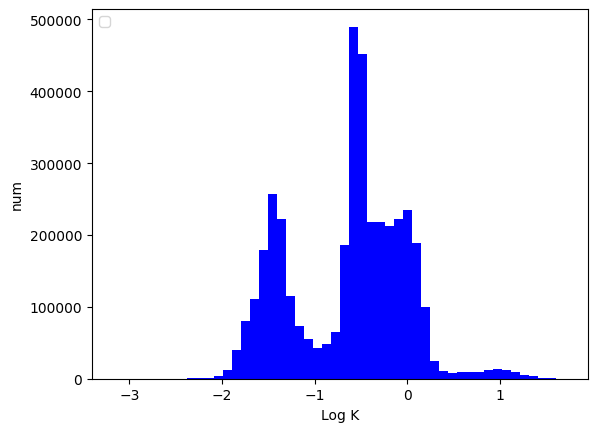

In [5]:
plt.figure()
plt.hist(all_log_k, bins=50, color='blue', label='')
# plt.vlines(199, 0, 1000, colors='red', label='traj_len=199')
# plt.title('')
plt.xlabel('Log K')
plt.ylabel('num')
plt.legend(loc='upper left')
plt.show()

原始数据的前几个值： [-1.4482969  -1.53307426 -1.53730476 -1.52775061 -1.52670777 -1.52196229
 -1.51791143 -1.52062571 -1.52472091 -1.52489591]
匹配后数据的前几个值： [-1.16471637 -1.36535924 -1.37236317 -1.35577195 -1.35369923 -1.34434385
 -1.33580678 -1.34146499 -1.34993085 -1.35030719]


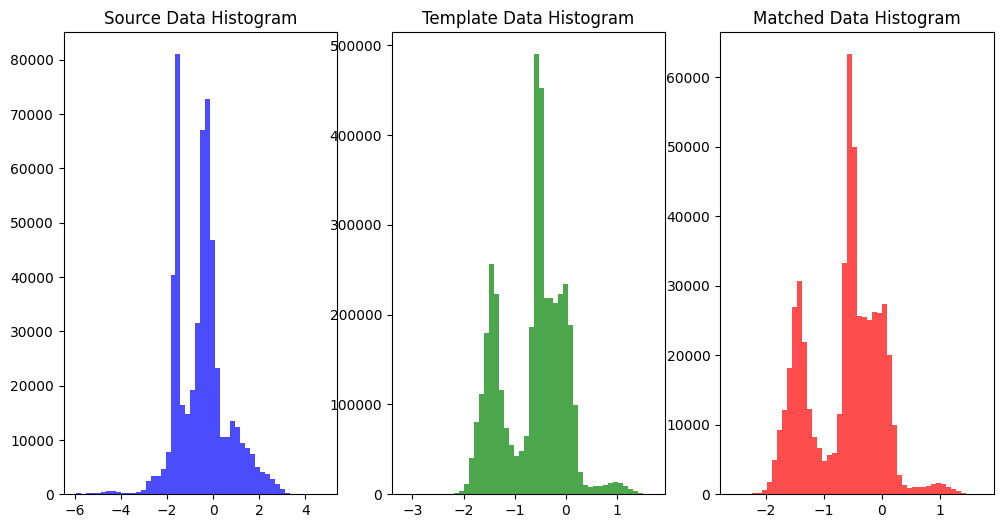

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def histogram_matching(source, template):
    oldshape = source.shape
    source = source.ravel()
    template = template.ravel()
    
    # 获取源数据和模板数据的直方图
    s_values, bin_idx, s_counts = np.unique(source, return_inverse=True, return_counts=True)
    t_values, t_counts = np.unique(template, return_counts=True)
    
    # 计算累积分布函数
    s_quantiles = np.cumsum(s_counts).astype(np.float64)
    s_quantiles /= s_quantiles[-1]
    
    t_quantiles = np.cumsum(t_counts).astype(np.float64)
    t_quantiles /= t_quantiles[-1]
    
    # 使用插值方法将源数据映射到目标数据
    interp_t_values = np.interp(s_quantiles, t_quantiles, t_values)
    
    return interp_t_values[bin_idx].reshape(oldshape)

# 示例数据
# N, T = 100, 100
source = np.array(all_logk_t1_vip) #np.random.normal(loc=0, scale=1, size=(N, T, 2))
template = np.array(all_logk_t2_all) #np.random.normal(loc=5, scale=2, size=(N, T, 2))

# 将源数据的直方图匹配到模板数据
matched_data = histogram_matching(source, template)

print("原始数据的前几个值：", source.ravel()[:10])
print("匹配后数据的前几个值：", matched_data.ravel()[:10])

# 画图对比结果
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.title("Source Data Histogram")
plt.hist(source.ravel(), bins=50, color='blue', alpha=0.7)

plt.subplot(1, 3, 2)
plt.title("Template Data Histogram")
plt.hist(template.ravel(), bins=50, color='green', alpha=0.7)

plt.subplot(1, 3, 3)
plt.title("Matched Data Histogram")
plt.hist(matched_data.ravel(), bins=50, color='red', alpha=0.7)

plt.show()



In [58]:
preds_all = deepcopy(preds_all_t1_vip)
pad_all = deepcopy(pad_all_t1_vip)
# all_log_k = deepcopy(all_logk_t1_vip)
all_log_k = deepcopy(matched_data)
tmp = []
cnt = 0
for i in exp_range:
    for j in fov_range:
        pred = preds_all[i][j]
        for idx in range(pred.shape[0]):
            count_true = np.sum(pad_all[i][j][idx])
            print(count_true)
            pred[idx, :count_true, 1] = np.array(all_log_k[cnt:cnt+count_true]).reshape(-1, )
            cnt += count_true
            tmp += pred[idx, :count_true, 1].tolist()
print(cnt)

200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
194
200
200
200
200
33
200
200
200
200
200
200
200
200
199
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
116
200
200
200
200
200
200
200
200
200
200
200
200
200
200
20
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
20
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
189
200
200
200
200
200
200
200
64
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
127
199
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
20
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
185
200
200
200
20
200
200
200
200
200
200
91
200
199
200
200
200
200
200
200
200
200
200
200
200
200

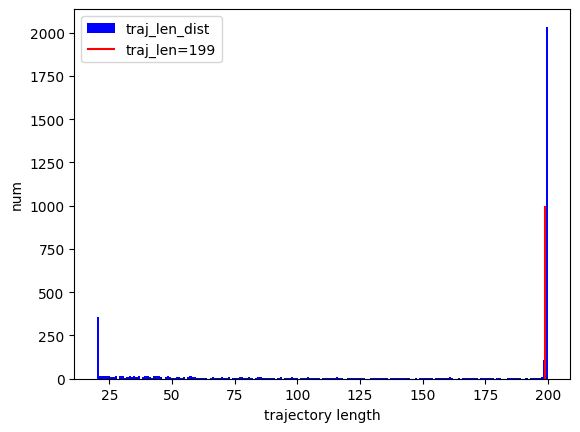

In [52]:
plt.figure()
plt.hist(all_len, bins=200, color='blue', label='traj_len_dist')
plt.vlines(199, 0, 1000, colors='red', label='traj_len=199')
# plt.title('')
plt.xlabel('trajectory length')
plt.ylabel('num')
plt.legend(loc='upper left')
plt.show()

In [100]:
np.percentile(all_len, 40)


196.0

2024-07-05 17:22:22,610 | WARNING : No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


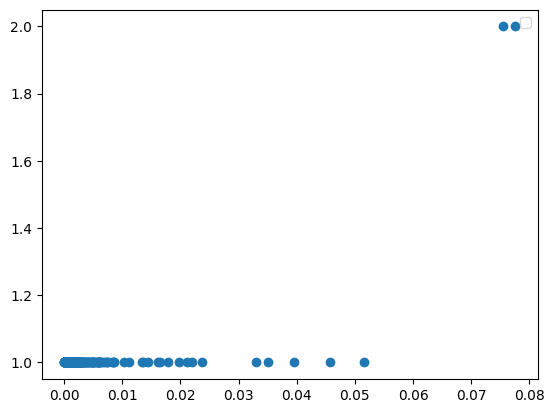

In [6]:
exp=0
plt.close()
# cmap = cm.get_cmap('jet', len(np.unique(lab_exp)))
fig = plt.figure()
# plt.scatter(a_var[0], cp_num[0])
plt.scatter(sum(a_var[exp], []), sum(cp_num[exp], []))
# plt.scatter(sum(k_var[exp], []), sum(cp_num[exp], []))
plt.legend()
plt.show()

In [23]:
percentile = 0.8 * 100
# pen_map = {-7: 20, -6: 10, -5: 1, -4: 0.6, -3: 0.3, -2: 0.1, -1: 0.05}
pen_map = {-11:80, -10: 80, -9: 60, -8: 30, -7: 20, -6: 10, -5: 5, -4: 2, -3: 1, -2: 0.5, -1: 0.2, 0: 0.1}
ideal_cp = [1, 0.5, 0.1, 1, 1, 20, 20, 1, 20, 1, 1, 1, 5]
print('exp\tidea\tpercen_a\t\tpen_a\tpercen_k\t\tpen_k')
min_percen = 10
offset = -1
for exp in exp_range:
    percen_a = np.percentile(np.array(sum(a_var[exp], [])), percentile)
    percen_k = np.percentile(np.array(sum(k_var[exp], [])), percentile)
    # print(exp, percen_a, percen_k)
    # min_percen = min(min_percen, round(np.log(percen_a)), round(np.log(percen_k)))
    print(exp, ideal_cp[exp], percen_a, round(np.log(percen_a)), pen_map[round(np.log(percen_a))+offset], percen_k, round(np.log(percen_k)), pen_map[round(np.log(percen_k))+offset], sep='\t')
# print(min_percen)
    
import csv

pen_list = []
offset
for exp in exp_range:
    percen_a = np.percentile(np.array(sum(a_var[exp], [])), percentile)
    percen_k = np.percentile(np.array(sum(k_var[exp], [])), percentile)
    pen_list.append((pen_map[round(np.log(percen_a))+offset], pen_map[round(np.log(percen_k))+offset]))
print(pen_list)

exp	idea	percen_a		pen_a	percen_k		pen_k
0	1	0.0008911328855901958	-7	30	0.0013798279454931622	-7	30
1	0.5	0.0010482135927304633	-7	30	0.0017896401463076473	-6	20
2	0.1	0.09933010190725329	-2	1	0.46135389208793653	-1	0.5
3	1	0.13640575408935549	-2	1	0.3334235429763795	-1	0.5
4	1	0.16360311210155487	-2	1	0.4362833499908447	-1	0.5
5	20	0.0008459640317596496	-7	30	0.01705464757978917	-4	5
6	20	0.01102407388389112	-5	10	0.06129846647381783	-3	2
7	1	0.05457205101847649	-3	2	0.2113142639398575	-2	1
8	20	0.0025899626314640047	-6	20	0.0039040077477693652	-6	20
9	1	0.07641724646091462	-3	2	0.11844431608915329	-2	1
10	1	0.0014208825305104256	-7	30	0.003039193106815219	-6	20
11	1	0.37584617733955394	-1	0.5	0.5885679364204407	-1	0.5
[(30, 30), (30, 20), (1, 0.5), (1, 0.5), (1, 0.5), (30, 5), (10, 2), (2, 1), (20, 20), (2, 1), (30, 20), (0.5, 0.5)]


In [7]:
from copy import deepcopy
pen_list_save = deepcopy(pen_list)

In [24]:
print(pen_list)

# -1 -4
# pen_list[0] = (30, 60)
# pen_list[1] = (30, 60)
# pen_list[9] = (10, 10)

# Track 2 0707
# pen_list[5] = (20, 1)
# pen_list[8] = (5, 5)
# pen_list[10] = (5, 5)

# Track 2 0708
# pen_list[0] = (30, 30)
# pen_list[1] = (30, 30)
# pen_list[5] = (10, )
# pen_list[10] = (5, 5)

# Track 2 0709
# pen_list[5] = (10, 1)
# pen_list[8] = (5, 2)
# pen_list[10] = (5, 5)

# Track 2 0710
# pen_list[2] = (0.5, 0.5)
# pen_list[3] = (0.5, 0.5)
# pen_list[4] = (0.5, 0.5)
# pen_list[5] = (5, 1)
# pen_list[7] = (1, 1)
# pen_list[8] = (5, 2)

# Track 2 0711
# pen_list[5] = (2, 1)
# pen_list[6] = (2, 2)
# pen_list[8] = (2, 2)

# Track 2 0712
# pen_list[2] = (1, 1)
# pen_list[3] = (1, 1)
# pen_list[5] = (1, 1)
# pen_list[6] = (2, 2)
# pen_list[8] = (1, 1)
# pen_list[9] = (0.5, 1)

# Track 2 0712
pen_list = deepcopy(pen_list_save)
pen_list[2] = (1, 1)
pen_list[3] = (1, 1)
pen_list[5] = (1, 1)
pen_list[6] = (2, 2)
pen_list[8] = (1, 1)
pen_list[9] = (0.5, 0.5)

cnt = [0, 0, 0, 0]
cp_num = []

filep_index = None

# pen_list = deepcopy(pen_list_save)
# for exp in range(12):
#     a, k = pen_list[exp]
#     if pen_list[exp][0] < 60:
#         if pen_list[exp][0] < 10:
#             a = pen_list[exp][0] * 4
#         else:
#             a = pen_list[exp][0] * 2
#     if pen_list[exp][1] < 80:
#         if pen_list[exp][1] < 10:
#             k = pen_list[exp][1] * 10
#         else:
#             k = pen_list[exp][1] * 5
#     pen_list[exp] = (a, k)
print(pen_list)
for exp in exp_range:
    pen_a = pen_list[exp][0]
    pen_k = pen_list[exp][1]
    cp_tmp = []
    for fov in fov_range:
        # filep_index = '/data3/fxc/AnDiChallenge/dataset/public_data_challenge_v0/track_1/exp_{}/convert_trajs_fov_index_{}.csv'.format(exp, fov)
        # with open(filep_index, 'r') as fp:
        #     data2 = csv.reader(fp)
        #     index_vip = []
        #     for i in data2:
        #         index_vip.append(int(i[0]))

        results = []
        print("Exp {} Fov {}".format(exp, fov))
        pred = preds_all[exp][fov]
        # print(pred.shape, pad_all[exp][fov].shape)
        for idx in range(pred.shape[0]):
            # print(idx, end='\t')
            count_true = np.sum(pad_all[exp][fov][idx])
            pre_a = pred[idx, :count_true, 0].tolist()
            pre_k = pred[idx, :count_true, 1].tolist()
            # if preds_all_stage2 is not None and exp in [11]:
            #     pre_state = np.argmax(preds_all_stage2[exp][fov][idx, :count_true, 4:], axis=-1).tolist()
            # if preds_all_stage2_c is not None and exp in [8,9,10]:
            #     pre_state = np.argmax(preds_all_stage2_c[exp][fov][idx, :count_true, 4:], axis=-1).tolist()
            model_a = rpt.KernelCPD(kernel="linear", min_size=3, jump=15).fit(np.array(pre_a))
            # 检测变点
            # breakpoints = model_a.predict(pen=30)
            breakpoints_a = model_a.predict(pen=pen_a)
            model_k = rpt.KernelCPD(kernel="linear", min_size=3, jump=15).fit(np.array(pre_k))
            breakpoints_k = model_k.predict(pen=pen_k)
            # breakpoints = sorted(list(set(breakpoints_a).union(set(breakpoints_k))))
            breakpoints = merge_changepoints(breakpoints_a, breakpoints_k)
            print(breakpoints)
            cp_tmp.append(len(breakpoints)-1)

            segments_a = [pre_a[i:j] for i, j in zip([0] + breakpoints, breakpoints + [None])]
            segments_k = [pre_k[i:j] for i, j in zip([0] + breakpoints, breakpoints + [None])]
            # if (preds_all_stage2 is not None and exp in [11]) or (preds_all_stage2_c is not None and exp in [8,9,10]):
            #     segments_state = [pre_state[i:j] for i, j in zip([0] + breakpoints, breakpoints + [None])]

            tmp = []
            if filep_index:
                tmp.append(int(index_vip[idx]))
            else:
                tmp.append(idx)

            for j in range(len(breakpoints)):
                aver_k=sum(segments_k[j]) / len(segments_k[j])
                aver_k=10 ** aver_k
                # aver_k=np.exp(aver_k).item()
                # tmp.append(aver_k)
                aver_a = sum(segments_a[j]) / len(segments_a[j])
                # tmp.append(aver_a)
                aver_state=2
                # if exp in [11] and preds_all_stage2 is not None:
                #     aver_state = round(sum(segments_state[j]) / len(segments_state[j]))
                #     if aver_state == 1:
                #         aver_state = 2
                #     if aver_state == 3 and aver_a <= 1:
                #         aver_state = 2
                #     if aver_state == 3 and aver_a < 1.9 and aver_a > 1:
                #         aver_a = 1.9
                #     if aver_a > 1.5:
                #         aver_state = 3
                #         aver_a = 1.9
                # if exp in [8,9,10] and preds_all_stage2_c is not None:
                #     aver_state = round(sum(segments_state[j]) / len(segments_state[j]))
                #     if aver_state == 3:
                #         aver_state = 2
                #     if aver_state == 1:
                #         if (aver_a > 1) or (exp in [9] and (aver_a > 0.5 or aver_k > 0.5)):
                #             aver_state = 2
                # if exp in [2, 3]:
                #     if aver_k < 0.02 and aver_a < 0.05:
                #         aver_state = 0
                # else: 
                if exp == 11:
                    if aver_a > 1:
                        aver_state = 3
                        aver_a = 1.9
                if aver_a < 2e-3: # 5e-3
                    print('alpha={} -> 0, state={} -> 0'.format(aver_a, aver_state))
                    aver_a = 0
                    aver_state = 0
                elif aver_a < 0.02: # 0.05
                    print('alpha={} < 0.05, state={} -> 1'.format(aver_a, aver_state))
                    # aver_a = 0
                    aver_state = 1
                if aver_a > 1.88:
                    print('alpha={} > 1.88, state={} -> 3'.format(aver_a, aver_state))
                    aver_state = 3
                    if aver_a > 1.99:
                        aver_a = 1.99
                if aver_k < 1e-11:
                    print('K={} -> 0, state={} -> 0, alpha={}'.format(aver_k, aver_state, aver_a))
                    aver_k = 0
                    aver_state = 0
                cnt[aver_state] += 1
                tmp.append(aver_k)
                tmp.append(aver_a)
                tmp.append(aver_state)
                tmp.append(breakpoints[j])

            results.append(tmp)
        
        save_dir = '../../challenge_results/0713/track_2/exp_{}'.format(exp)
        # save_dir = '../../results/daR_new/track_2_test_0707/exp_{}'.format(exp)
        os.makedirs(save_dir, exist_ok=True)

        file = open(save_dir + '/fov_{}.txt'.format(fov), 'w')

        # 定义一个数组

        # 将数组逐行写入txt文件，用逗号隔开
        for item1 in results:
            for i,item2 in enumerate(item1):
                if i != len(item1)-1:
                    file.write(str(item2) + ',')
                else:
                    file.write(str(item2))
            file.write('\n')
        # 关闭文件
        file.close()
    cp_num.append(cp_tmp)


[(30, 30), (30, 20), (1, 0.5), (1, 0.5), (1, 0.5), (30, 5), (10, 2), (2, 1), (20, 20), (2, 1), (30, 20), (0.5, 0.5)]
[(30, 30), (30, 20), (1, 1), (1, 1), (1, 0.5), (1, 1), (2, 2), (2, 1), (1, 1), (0.5, 0.5), (30, 20), (0.5, 0.5)]
Exp 0 Fov 0
[200]
[200]
[200]
[200]
[200]
[200]
[200]
[200]
[150]
[200]
[200]
[200]
[200]
[200]
[200]
[200]
[200]
[199]
[200]
[200]
[200]
[200]
[200]
[200]
[121]
[26]
[200]
[200]
[200]
[200]
[200]
[200]
[200]
[200]
[200]
[200]
[200]
Exp 0 Fov 1
[200]
[200]
[200]
[200]
[200]
[200]
[200]
[200]
[200]
[200]
[200]
[200]
[27]
[31]
[103]
[200]
[200]
[200]
[200]
[200]
[200]
[200]
[200]
[200]
[200]
[200]
[200]
[200]
Exp 0 Fov 2
[177]
[200]
[200]
[200]
[200]
[200]
[200]
[200]
[200]
[200]
[200]
[200]
[200]
[200]
[200]
[200]
[200]
[200]
[200]
[200]
[200]
[200]
[200]
[200]
[200]
[200]
[200]
[200]
[200]
[200]
[200]
[200]
[200]
[200]
[200]
[200]
[200]
Exp 0 Fov 3
[200]
[200]
[200]
[200]
[200]
[200]
[200]
[36]
[200]
[200]
[200]
[200]
[200]
[200]
[200]
[200]
[200]
[200]
[200]


In [63]:
print(cnt)
for i, item in enumerate(cp_num):
    print(i, sum(item))

[32, 5, 54254, 4520]
0 1
1 7
2 1761
3 1740
4 11669
5 1082
6 578
7 12011
8 575
9 2006
10 9
11 6681


In [26]:
print(cnt)
for i, item in enumerate(cp_num):
    print(i, sum(item))

[0, 7, 65099, 7344]
0 0
1 0
2 866
3 773
4 9064
5 540
6 1129
7 21569
8 417
9 2373
10 0
11 7450


In [54]:
# cnt[0], cnt[1], cnt[2] - cnt[0] - cnt[1] - cnt[3], cnt[3]
print(cnt)
for i, item in enumerate(cp_num):
    print(i, sum(item))

[161, 397, 68165, 3291]
0 0
1 0
2 890
3 828
4 9064
5 537
6 1129
7 21569
8 335
9 1943
10 0
11 7450


0
0
890
828
9064
536
1034
21569
298
1943
0
7450


In [2]:
preds_all = np.load('../../challenge_results/0705/daR/track_2_all_preds_all.npy', allow_pickle=True)
pad_all = np.load('../../challenge_results/0705/daR/track_2_all_pad_all.npy', allow_pickle=True)
# preds_all = np.load('../../challenge_results/0710/oyX/track_1_all_preds_all.npy', allow_pickle=True)
# pad_all = np.load('../../challenge_results/0710/oyX/track_1_all_pad_all.npy', allow_pickle=True)
root = '../../challenge_results/0714/daR_new/track_2'
# preds_all = np.load('../../challenge_results/0708/daR/track_1_all_preds_all.npy', allow_pickle=True)
# pad_all = np.load('../../challenge_results/0708/daR/track_1_all_pad_all.npy', allow_pickle=True)
# root = '../../challenge_results/0708/daR/track_1_all'
# K_map = {0: (1, 1), 1: (1, 1), 2: (2, 2), 3: (3, 4), 4: (2, 2), 5: (1, 3), 6: (1, 2), 7: (3, 2), 8: (2, 2), 9: (2, 2), 10: (3, 3), 11: (2, 2)} # 10: (2, 2) ? 
# preds_all = np.load('../../challenge_results/0706/daR/track_1_all_preds_all.npy', allow_pickle=True)
# pad_all = np.load('../../challenge_results/0706/daR/track_1_all_pad_all.npy', allow_pickle=True)
# root = '../../challenge_results/0707/daR_new/track_1_all'
# K_map = {0: (2, 2), 1: (2, 2), 2: (2, 2), 3: (4, 4), 4: (2, 2), 5: (3, 3), 6: (2, 2), 7: (2, 2), 8: (2, 2), 9: (2, 2), 10: (3, 3), 11: (2, 2)}
# preds_all = np.load('../../challenge_results/7av/track_1_all_preds_all.npy', allow_pickle=True)
# pad_all = np.load('../../challenge_results/7av/track_1_all_pad_all.npy', allow_pickle=True)
# root = '../../challenge_results/7av_new/track_1_all'

import csv
import imp
import ensemble_task
imp.reload(ensemble_task)



#### set param

K_max_a = 5
K_max_k = 4
progressive_explore = False

preds_all_new = preds_all
num_exp=12
exp_range = range(num_exp)
num_fov=30
fov_range = range(num_fov)
a_all = [[] for i in exp_range]
k_all = [[] for i in exp_range]
for i in exp_range:
    for j in fov_range:
        pred = preds_all[i][j]
        for idx in range(pred.shape[0]):
            count_true = np.sum(pad_all[i][j][idx])
            a_all[i] += pred[idx, :count_true, 0].tolist()
            k_all[i] += (10 ** pred[idx, :count_true, 1]).tolist()
print(len(a_all[0]), len(k_all[0]))

def get_weight(assigned_mu, assigned_sigma):
    # weight = np.zeros((np.unique(assigned_mu).shape[0], 1))
    weight_map = {}
    time_sum = 0
    for i in range(assigned_mu.shape[0]):
        key = '{}_{}_{}_{}'.format(assigned_mu[i][0], assigned_mu[i][1], assigned_sigma[i][0], assigned_sigma[i][1],)
        if key not in weight_map:
            weight_map[key] = 0
        weight_map[key] += 1
        time_sum += 1
    print(weight_map)
    results = []
    for key, value in weight_map.items():
        keys = key.split('_')
        # print(keys)
        ratio = value / time_sum
        flag = False
        # if ratio < 0.05:
        #     for idx, item in enumerate(results):
        #         if keys[0] == str(item[0]):
        #             if int(np.log10(float(keys[1]))) == int(np.log10(float(keys[3]))):
        #                 print(results[idx][4])
        #                 results[idx][4] += ratio
        #                 flag = True
        #                 break
        #         if keys[1] == str(item[2]):
        #             if int(np.log10(float(keys[0]))) == int(np.log10(float(keys[2]))):
        #                 print(results[idx][4])
        #                 results[idx][4] += ratio
        #                 flag = True
        #                 break
        #     if flag:
        #         print("Merge: ", [float(keys[0]), float(keys[2]), float(keys[1]), float(keys[3]), ratio], 'to', results[idx])
        #     continue
        if not flag:
            results.append([float(keys[0]), float(keys[2]), float(keys[1]), float(keys[3]), ratio])
    return results

exp_range = range(num_exp)
for exp in exp_range:
    # K_max_a, K_max_k = K_map[exp]
    print('Processing: ', exp)
    # fov_res = preds_all_new[exp]
    alpha = np.array(a_all[exp]).reshape(-1, 1)
    K = np.array(k_all[exp]).reshape(-1, 1)
    assigned_mu_alpha, assigned_sigma_alpha = ensemble_task.gmm_fit(alpha, K_max=K_max_a, progressive_explore=progressive_explore)
    assigned_mu_K, assigned_sigma_K = ensemble_task.gmm_fit(K, K_max=K_max_k, progressive_explore=progressive_explore)
    # joint = np.concatenate((alpha, K), axis=-1)
    # assigned_mu, assigned_sigma = gmm_fit(joint, K_max=5)
    cat_mu = np.concatenate((assigned_mu_alpha.reshape(-1,1), assigned_mu_K.reshape(-1,1)), axis=-1)
    cat_sigma = np.concatenate((assigned_sigma_alpha.reshape(-1,1), assigned_sigma_K.reshape(-1,1)), axis=-1)
    ensemble_results = get_weight(cat_mu, cat_sigma)
    print("num: {}".format(len(ensemble_results)))
    file_path = os.path.join(root, 'exp_{}'.format(exp), 'ensemble_labels.txt')
    # with open(file_path, 'w') as f:
    #     f.write('model: multi_state; num_state: {}\n'.format(len(ensemble_results)))
    #     writer = csv.writer(f, delimiter=';')
    #     # writer.writerows(ensemble_results)
    #     writer.writerows(list(map(list, zip(*ensemble_results)))) # transpose]
    os.makedirs(os.path.join(root, 'ensemble', 'exp_{}'.format(exp)), exist_ok=True)
    file_path = os.path.join(root, 'ensemble', 'exp_{}'.format(exp), 'ensemble_labels.txt')
    with open(file_path, 'w') as f:
        f.write('model: multi_state; num_state: {}\n'.format(len(ensemble_results)))
        writer = csv.writer(f, delimiter=';')
        # writer.writerows(ensemble_results)
        writer.writerows(list(map(list, zip(*ensemble_results)))) # transpose


/tmp/ipykernel_18544/288787366.py:19: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  import imp


185292 185292
Processing:  0
根据BIC选择的最佳模型的高斯分布数量: 5
根据BIC选择的最佳模型的估计均值:  [0.60465458 0.79595208 0.71716959 0.88886957 0.52679783]
根据BIC选择的最佳模型的估计方差:  [0.00362791 0.00140299 0.00171002 0.00380375 0.06962984]
根据BIC选择的最佳模型的估计权重:  [0.11982002 0.37922635 0.30162215 0.1816057  0.01772578]
根据BIC选择的最佳模型的高斯分布数量: 4
根据BIC选择的最佳模型的估计均值:  [0.04199769 0.03414496 0.04262565 0.02762612]
根据BIC选择的最佳模型的估计方差:  [1.46522644e-04 1.91470041e-05 2.39103935e-05 2.55029975e-05]
根据BIC选择的最佳模型的估计权重:  [0.11671801 0.34147302 0.38290464 0.15890434]
{'0.8888695672051528_0.04262564770943547_0.06167454040010514_0.004889825509625775': 16932, '0.8888695672051528_0.04199769251531671_0.06167454040010514_0.012104653812070251': 994, '0.6046545752336064_0.027626117624487776_0.06023213548106582_0.005050049253813414': 9785, '0.6046545752336064_0.03414495780551281_0.06023213548106582_0.004375728982659651': 7027, '0.7171695915751003_0.027626117624487776_0.0413523373944957_0.005050049253813414': 8788, '0.6046545752336064_0.04262564770

In [40]:
import numpy as np
from sklearn.mixture import BayesianGaussianMixture
import matplotlib.pyplot as plt

preds_all = np.load('../../challenge_results/0705/daR/track_2_all_preds_all.npy', allow_pickle=True)
pad_all = np.load('../../challenge_results/0705/daR/track_2_all_pad_all.npy', allow_pickle=True)
root = '../../challenge_results/0711/daR_new/track_2'

preds_all_new = preds_all
num_exp=12
exp_range = range(num_exp)
num_fov=30
fov_range = range(num_fov)
a_all = [[] for i in exp_range]
k_all = [[] for i in exp_range]
for i in exp_range:
    for j in fov_range:
        pred = preds_all[i][j]
        for idx in range(pred.shape[0]):
            count_true = np.sum(pad_all[i][j][idx])
            if False:
            # if i in [10, 11]:
                t = pred[idx, :count_true, 0]
                t[t > 1] = 1.9
                a_all[i] += t.tolist()
            else:
                a_all[i] += pred[idx, :count_true, 0].tolist()
            k_all[i] += (10 ** pred[idx, :count_true, 1]).tolist()
print(len(a_all[0]), len(k_all[0]))

def bgmm(a):
    # 使用贝叶斯高斯混合模型，设定较大的最大成分数量
    max_components = 8  # 可以根据需要调整
    bgmm_a = BayesianGaussianMixture(n_components=max_components, random_state=42)
    bgmm_a.fit(a.reshape(-1, 1))

    # 获取拟合的参数
    means_a = bgmm_a.means_.flatten()
    covariances_a = bgmm_a.covariances_.flatten()
    weights_a = bgmm_a.weights_

    # 过滤掉权重非常小的成分
    threshold = 1e-3
    valid_components_a = weights_a > threshold
    filtered_means_a = means_a[valid_components_a]
    filtered_covariances_a = covariances_a[valid_components_a]
    filtered_weights_a = weights_a[valid_components_a]

    print('means: ', filtered_means_a)
    print('vars: ', filtered_covariances_a)
    print('weights: ', filtered_weights_a)

    posterior_probs_a = bgmm_a.predict_proba(a.reshape(-1, 1))

    estimated_means_a = np.dot(posterior_probs_a, means_a)
    estimated_variances_a = np.dot(posterior_probs_a, covariances_a)
    return estimated_means_a, estimated_variances_a

exp_range = range(num_exp)
for exp in exp_range:
    # K_max_a, K_max_k = K_map[exp]
    print('Processing: ', exp)
    # fov_res = preds_all_new[exp]
    alpha = np.array(a_all[exp]).reshape(-1, 1)
    K = np.array(k_all[exp]).reshape(-1, 1)
    assigned_mu_alpha, assigned_sigma_alpha = bgmm(alpha)
    assigned_mu_K, assigned_sigma_K = bgmm(K)
    # joint = np.concatenate((alpha, K), axis=-1)
    # assigned_mu, assigned_sigma = gmm_fit(joint, K_max=5)
    cat_mu = np.concatenate((assigned_mu_alpha.reshape(-1,1), assigned_mu_K.reshape(-1,1)), axis=-1)
    cat_sigma = np.concatenate((assigned_sigma_alpha.reshape(-1,1), assigned_sigma_K.reshape(-1,1)), axis=-1)
    # ensemble_results = get_weight(cat_mu, cat_sigma)

185292 185292
Processing:  0


/home/jiangy/anaconda3/envs/andi2/lib/python3.10/site-packages/sklearn/mixture/_base.py:270: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(


means:  [0.60316101 0.79079609 0.71511831 0.87690425 0.62340757]
vars:  [0.00348045 0.00155139 0.00204636 0.00414475 0.06002742]
weights:  [0.10420321 0.36803099 0.28911231 0.20495384 0.03369965]


/home/jiangy/anaconda3/envs/andi2/lib/python3.10/site-packages/sklearn/mixture/_base.py:270: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(


means:  [0.04130482 0.03510975 0.03814677 0.03185336 0.06362371]
vars:  [4.39267447e-05 5.47084778e-05 6.28113876e-05 4.01377140e-05
 5.83469296e-04]
weights:  [0.20978155 0.33564601 0.34550009 0.10374187 0.00533048]
Processing:  1


/home/jiangy/anaconda3/envs/andi2/lib/python3.10/site-packages/sklearn/mixture/_base.py:270: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(


means:  [0.7400015  0.81130571 0.67654966 0.67454753 0.89747268]
vars:  [0.00204058 0.00145308 0.00279527 0.03627403 0.00273455]
weights:  [0.29209513 0.27694331 0.21204789 0.09165533 0.12725833]


/home/jiangy/anaconda3/envs/andi2/lib/python3.10/site-packages/sklearn/mixture/_base.py:270: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(


means:  [0.03512693 0.04187512 0.03730702 0.07229762 0.03587339]
vars:  [4.31902914e-05 9.90803017e-05 4.79374897e-05 8.19296119e-04
 3.80725352e-05]
weights:  [0.07726475 0.06363685 0.36327029 0.00329439 0.49253372]
Processing:  2


/home/jiangy/anaconda3/envs/andi2/lib/python3.10/site-packages/sklearn/mixture/_base.py:270: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(


means:  [0.96794169 0.05982078 0.22403129 1.10232064 1.00461441]
vars:  [0.0160346  0.00095323 0.01847536 0.01719274 0.00524929]
weights:  [0.40411379 0.13036024 0.02424396 0.11679508 0.32448693]


/home/jiangy/anaconda3/envs/andi2/lib/python3.10/site-packages/sklearn/mixture/_base.py:270: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(


means:  [0.99425712 0.01541869 0.66765028 1.21702308 1.3249814 ]
vars:  [2.19060285e-02 4.92953464e-05 2.27066472e-02 2.97226446e-01
 4.81356749e-02]
weights:  [0.26851477 0.15144193 0.2708107  0.09155247 0.21768013]
Processing:  3


/home/jiangy/anaconda3/envs/andi2/lib/python3.10/site-packages/sklearn/mixture/_base.py:270: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(


means:  [0.077164   0.99016065 0.86872383 0.16167794 1.02047741]
vars:  [0.00104038 0.00831673 0.08280521 0.00349688 0.03267154]
weights:  [0.20177059 0.34902423 0.03901249 0.3547677  0.05542499]


/home/jiangy/anaconda3/envs/andi2/lib/python3.10/site-packages/sklearn/mixture/_base.py:270: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(


means:  [0.04129352 0.98845874 0.66374987 2.13001104 1.34444791]
vars:  [3.82864818e-04 4.64562632e-02 7.43788797e-02 1.13877137e+00
 9.68956300e-02]
weights:  [0.55352459 0.17789144 0.18156182 0.00338454 0.0836376 ]
Processing:  4


/home/jiangy/anaconda3/envs/andi2/lib/python3.10/site-packages/sklearn/mixture/_base.py:270: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(


means:  [0.9482697  0.13607504 1.01074095 1.10632967 0.6869792 ]
vars:  [0.01058384 0.00430686 0.00669497 0.01830276 0.10180778]
weights:  [0.22329834 0.29263931 0.3137429  0.1112315  0.05908794]


/home/jiangy/anaconda3/envs/andi2/lib/python3.10/site-packages/sklearn/mixture/_base.py:270: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(


means:  [1.70529526 0.0426365  1.30390978 0.70138646 0.90424513]
vars:  [6.22632208e-01 4.39601777e-04 7.49602926e-02 7.75836793e-02
 6.09353071e-02]
weights:  [0.01424499 0.30245868 0.22883695 0.21553276 0.23892661]
Processing:  5


/home/jiangy/anaconda3/envs/andi2/lib/python3.10/site-packages/sklearn/mixture/_base.py:270: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(


means:  [0.97118644 0.99529687 1.06489741 0.94873779 1.03583866]
vars:  [0.01481091 0.00083778 0.00215984 0.00104976 0.00116032]
weights:  [0.08180513 0.33456045 0.08523242 0.25111863 0.24728336]


/home/jiangy/anaconda3/envs/andi2/lib/python3.10/site-packages/sklearn/mixture/_base.py:270: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(


means:  [0.54821451 0.26870547 0.7058716  1.12498512 0.42790756]
vars:  [0.00837387 0.00895442 0.0395258  0.26432136 0.0088327 ]
weights:  [0.3627054  0.17019153 0.14598617 0.01528553 0.30583137]
Processing:  6


/home/jiangy/anaconda3/envs/andi2/lib/python3.10/site-packages/sklearn/mixture/_base.py:270: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(


means:  [1.03042298 0.94859807 0.83624164 0.83863258 1.10459947]
vars:  [0.00450396 0.00312583 0.06641441 0.0056282  0.00576668]
weights:  [0.29283804 0.314394   0.10284035 0.11107055 0.17885706]


/home/jiangy/anaconda3/envs/andi2/lib/python3.10/site-packages/sklearn/mixture/_base.py:270: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(


means:  [0.33356684 0.47226001 0.61249815 1.07511387 0.09779864]
vars:  [0.0103801  0.00684363 0.03159183 0.28989908 0.00204892]
weights:  [0.40700683 0.36468112 0.14034296 0.0204532  0.06751589]
Processing:  7


/home/jiangy/anaconda3/envs/andi2/lib/python3.10/site-packages/sklearn/mixture/_base.py:270: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(


means:  [1.17592667 0.70658549 0.94866291 0.40603171 1.41589385]
vars:  [0.02015282 0.01618847 0.01328589 0.02380171 0.03294992]
weights:  [0.19387425 0.28400214 0.29600743 0.12077757 0.1053386 ]


/home/jiangy/anaconda3/envs/andi2/lib/python3.10/site-packages/sklearn/mixture/_base.py:270: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(


means:  [0.31335386 0.03008263 0.08698853 0.26783718 0.37226809]
vars:  [0.00297598 0.00012365 0.00153625 0.00188626 0.03170427]
weights:  [0.28034838 0.17824054 0.0648001  0.46429408 0.0123169 ]
Processing:  8


/home/jiangy/anaconda3/envs/andi2/lib/python3.10/site-packages/sklearn/mixture/_base.py:270: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(


means:  [0.69772834 1.13167954 0.11003475 1.01990051 0.38933584]
vars:  [0.01728265 0.03295784 0.00330525 0.02072648 0.01632257]
weights:  [0.28535061 0.15498909 0.04805458 0.24527998 0.26632574]


/home/jiangy/anaconda3/envs/andi2/lib/python3.10/site-packages/sklearn/mixture/_base.py:270: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(


means:  [0.45998746 0.77108504 0.08896644 1.08818362 0.24455703]
vars:  [0.01088149 0.04641804 0.0018195  0.2419519  0.00889519]
weights:  [0.20572453 0.23790085 0.23072861 0.01255012 0.31309589]
Processing:  9


/home/jiangy/anaconda3/envs/andi2/lib/python3.10/site-packages/sklearn/mixture/_base.py:270: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(


means:  [1.2016573  0.55286556 1.05428869 0.23034241 0.81608556]
vars:  [0.03578477 0.01811817 0.02114721 0.01253473 0.01777309]
weights:  [0.15598998 0.24736725 0.27294429 0.12183157 0.20186691]


/home/jiangy/anaconda3/envs/andi2/lib/python3.10/site-packages/sklearn/mixture/_base.py:270: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(


means:  [0.9691324  0.26590623 0.61013922 1.64488702 0.07879132]
vars:  [0.08429204 0.01264173 0.02902538 0.55524811 0.00149407]
weights:  [0.13822694 0.33306129 0.35161018 0.01337554 0.16372604]
Processing:  10


/home/jiangy/anaconda3/envs/andi2/lib/python3.10/site-packages/sklearn/mixture/_base.py:270: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(


means:  [1.29037565 0.10556312 0.38559323 1.68921604 0.82131039]
vars:  [0.03237901 0.00461086 0.02299435 0.01888428 0.02879018]
weights:  [0.27192613 0.12329719 0.25450638 0.08606772 0.26420258]


/home/jiangy/anaconda3/envs/andi2/lib/python3.10/site-packages/sklearn/mixture/_base.py:270: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(


means:  [ 3.15077817 22.63202376  8.13947076  0.78127494 14.33746418]
vars:  [ 1.9091637  61.06024896  7.33086662  0.30286213 19.04002171]
weights:  [0.25550693 0.04218847 0.36428545 0.15384394 0.1841752 ]
Processing:  11


/home/jiangy/anaconda3/envs/andi2/lib/python3.10/site-packages/sklearn/mixture/_base.py:270: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(


means:  [0.20099971 1.70907971 1.38690948 1.84859287 0.62619116]
vars:  [0.00893013 0.0109431  0.05419192 0.00403285 0.06319792]
weights:  [0.07060874 0.26651083 0.06151516 0.5073417  0.09402357]
means:  [0.02117206 0.92767494 3.34766854 1.79175281 0.46587092]
vars:  [1.52340882e-04 1.10079878e-01 2.42886565e+00 4.52269753e-01
 4.74397615e-02]
weights:  [0.20261208 0.17961309 0.01174841 0.06390649 0.54211993]


/home/jiangy/anaconda3/envs/andi2/lib/python3.10/site-packages/sklearn/mixture/_base.py:270: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(


In [35]:
1.40970578+np.sqrt(0.05582661)

1.6459823340632416

In [32]:
10 ** np.array([-0.58182036, -1.82769999, -0.94636441]), 10 ** np.array([0.0225418,  0.0070492,  0.08187755])

(array([0.26192662, 0.01486962, 0.11314506]),
 array([1.05327506, 1.01636383, 1.20747334]))

In [39]:
cp_count = [[[] for j in fov_range] for i in exp_range]
a_np = []
k_np = []
cp_np = []
lab_exp = []
for i in exp_range:
    for j in fov_range:
        tmp = []
        for k in range(len(a_var[i][j])):
            tmp.append(len(cp_num[i][j][k]))
            # print(i, j, k, len(cp_num[i][j][k]), a_var[i][j][k], 10 ** k_var[i][j][k])
            a_np.append(a_var[i][j][k])
            k_np.append(k_var[i][j][k])
            cp_np.append(len(cp_num[i][j][k]))
            lab_exp.append(i)
        cp_count[i][j] = tmp
a_np = np.array(a_np)
k_np = np.array(k_np)
cp_np = np.array(cp_np)
lab_exp = np.array(lab_exp)

In [36]:
lab_exp

array([ 1,  1,  1, ..., 13, 13, 13])

/tmp/ipykernel_39781/1191083384.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('jet', len(np.unique(lab_exp)))
2024-06-29 13:00:01,605 | WARNING : No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


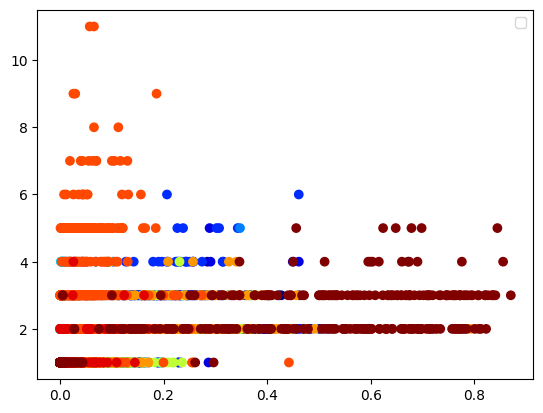

In [43]:
plt.close()
cmap = cm.get_cmap('jet', len(np.unique(lab_exp)))
fig = plt.figure()
plt.scatter(a_np[:], cp_np[:], c=lab_exp[:], cmap=cmap)
# plt.plot([1,2,3], [4,54,6])
plt.legend()
plt.show()

In [72]:
tmp_breakpoints = [6,7,11,14,15,38,39,40]

breakpoints = []
i = 1
pre = tmp_breakpoints[0]
while i < (len(tmp_breakpoints) - 1):
    tmp = pre
    print(i, tmp)
    if tmp_breakpoints[i + 1] - pre <= 3:
        print('merge3: ', pre, tmp_breakpoints[i:i+2])
        pre = round((pre + tmp_breakpoints[i] + tmp_breakpoints[i+1]) / 3)
        i = i + 1
    elif tmp_breakpoints[i] - pre <= 3:
        print('merge2: ', pre, tmp_breakpoints[i:i+1])
        pre = round((pre + tmp_breakpoints[i]) / 2)
        i = i + 1
    else:
        pre = tmp_breakpoints[i]
        i = i + 1
    breakpoints.append(pre)
print(breakpoints)

1 6
merge2:  6 [7]
2 6
3 11
merge2:  11 [14]
4 12
merge2:  12 [15]
5 14
6 38
merge3:  38 [39, 40]
[6, 11, 12, 14, 38, 39]


In [76]:
def merge_close_points_average(sorted_list):
    if not sorted_list:
        return []

    merged_points = []
    current_merge = [sorted_list[0]]

    for i in range(1, len(sorted_list)):
        if sorted_list[i] - current_merge[-1] < 3:
            current_merge.append(sorted_list[i])
        else:
            # Calculate average of current_merge
            average_value = round(sum(current_merge) / len(current_merge))
            merged_points.append(average_value)
            current_merge = [sorted_list[i]]

    # Append the average of the last group
    average_value = round(sum(current_merge) / len(current_merge))
    merged_points.append(average_value)

    return merged_points

merge_close_points_average([1])

[1]

In [10]:
t0 = 0
k1, a1, s1, t1, k2, a2, s2, t2 = 0.040797585480740306,0.7658367201685905,2,40,0.02535920410211726,0.08442279733717442,2,200
# k2, a2, s2, t2 = 0.029472049022845566,0.6737451150303795,2,114
print("{},{},{}".format((k1 * (t1 - t0) + k2 * (t2 - t1)) / (t2 - t0), (a1 * (t1 - t0) + a2 * (t2 - t1)) / (t2 - t0), t2))

0.02844688037784187,0.22070558190345765,200


In [36]:
import numpy as np

# 已知预测的样本数量
predicted_counts = {
    0: 3700,
    1: 1812,
    2: 61000,
    3: 5600
}
target_f1_score = 0.91234
target_jsc = 0.645

# Best match found: 0类=4800, 1类=2800, 2类=50000, 3类=7800
# Achieved F1 Score: 0.9133333333333333

# predicted_counts = {
#     0: 100,
#     1: 0,
#     2: 63000,
#     3: 7200
# }
# target_f1_score = 0.9134
# target_jsc = 0.645
# Best match found: 0类=4800, 1类=2800, 2类=50000, 3类=7800

predicted_counts = {
    0: 100,
    1: 340,
    2: 69000,
    3: 956
}
target_f1_score = 0.9058
target_jsc = 0.632
# 0类=4800, 1类=2800, 2类=53000, 3类=7800


# 定义搜索范围
search_range = {
    0: range(0, 20000, 1000),
    1: range(0, 20000, 1000),
    2: range(50000, 90000, 1000),
    3: range(2000, 50000, 1000)
}

def calculate_f1_score(TP, FP, FN):
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    if precision + recall == 0:
        return 0
    return 2 * (precision * recall) / (precision + recall)

best_match = None
best_f1_score = 0
best_distribution = None

# 搜索每种样本数量的组合
for a in search_range[0]:
    for b in search_range[1]:
        for c in search_range[2]:
            for d in search_range[3]:
                actual_counts = {0: a, 1: b, 2: c, 3: d}
                total_predicted = sum(predicted_counts.values())
                total_actual = sum(actual_counts.values())
                
                matched_points = int(target_jsc * (total_predicted + total_actual) / (1 + target_jsc))
                
                # 假设匹配点的比例与实际点的比例相同
                matched_2 = int(matched_points * (predicted_counts[2] / total_predicted))
                TP = min(matched_2, c)
                FP = predicted_counts[2] - TP
                FN = c - TP

                f1_score = calculate_f1_score(TP, FP, FN)
                if abs(f1_score - target_f1_score) < abs(best_f1_score - target_f1_score):
                    best_f1_score = f1_score
                    best_distribution = (a, b, c, d)

print(f"Best match found: 0类={best_distribution[0]}, 1类={best_distribution[1]}, 2类={best_distribution[2]}, 3类={best_distribution[3]}")
print(f"Achieved F1 Score: {best_f1_score}")



Best match found: 0类=0, 1类=0, 2类=78000, 3类=27000
Achieved F1 Score: 0.90578231292517
